In [2]:
%cd ..
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import sys
import seaborn as sns

import functions,loading

import nelpy as nel  # main nelpy imports

from scipy.stats import zscore


d:\github\ripple_heterogeneity\python


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [5]:
def load_basic_data(basepath):
    nChannels, fs, fs_dat, shank_to_channel = functions.loadXML(basepath)
    ripples = loading.load_ripples_events(basepath)
    cell_metrics,data = loading.load_cell_metrics(basepath)
    return cell_metrics,data,ripples,fs_dat

def get_participation_fr(st,ripple_epochs):
    # get participation prob.
    # make matrix n rows (units) by n cols (ripple epochs)
    unit_mat = np.zeros((st.n_units,ripple_epochs.n_intervals))
    for i,event in enumerate(st):
        unit_mat[:,i] = event.n_events/ripple_epochs[i].length
    return unit_mat

def get_participation(st,ripple_epochs):
    # get participation prob.
    # make matrix n rows (units) by n cols (ripple epochs)
    unit_mat = np.zeros((st.n_units,ripple_epochs.n_intervals))
    for i,event in enumerate(st):
        unit_mat[:,i] = (event.n_events>0)*1
    return unit_mat

In [6]:
df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
df = df.loc[df['basepath'].str.contains("grosmark", case=False)]
basepath = df.basepath.iloc[0]

cell_metrics,data,ripples,fs_dat = load_basic_data(basepath)
restrict_idx = ((cell_metrics.putativeCellType == "Pyramidal Cell") &
                    ((cell_metrics.brainRegion=="CA1") |
                    (cell_metrics.brainRegion=="rCA1") |
                    (cell_metrics.brainRegion=="lCA1")) &
                     (cell_metrics.bad_unit==False))

# restrict cell metrics                      
cell_metrics = cell_metrics[restrict_idx]

# get ripple epochs
ripple_epochs = nel.EpochArray([np.array([ripples.start,ripples.stop]).T])
st_unit = nel.SpikeTrainArray(timestamps=np.array(data['spikes'],dtype=object)[restrict_idx], fs=fs_dat)

# behavioral epochs
behavioral_epochs = nel.EpochArray([np.array([data['epochs'].startTime,
                                                    data['epochs'].stopTime]).T])


# create spike train object with ripple epochs
st_unit_rip = st_unit[ripple_epochs]

epochs = ['pre','task','post']

# ep = behavioral_epochs[0]

unit_mat = get_participation(st_unit_rip,
                                ripple_epochs)
                                
participation_prob = np.sum(unit_mat,axis=1) / unit_mat.shape[1]

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:709: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [21]:
unit_mat_fr = get_participation_fr(st_unit_rip,
                                ripple_epochs)

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


In [50]:
unit_mat_fr_nel = nel.AnalogSignalArray(data=unit_mat_fr,timestamps=ripple_epochs.starts)
unit_mat_fr_nel = unit_mat_fr_nel.zscore()

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:236: UserWarning: fs was not specified, so we try to estimate it from the data...
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:238: UserWarning: fs was estimated to be 0.7977026164645783 Hz
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [91]:
bst = st_unit.bin(ds=.1).smooth(sigma=.2)


In [8]:
import sys
sys.path.append(r'D:\github\rastermap\rastermap')
import mapping, imp

In [106]:
# sp = unit_mat_fr_nel[behavioral_epochs[1]].data
sp = bst[behavioral_epochs[1]].data
sp = zscore(sp,axis=1)
sp[np.isnan(sp)] = 0
model = mapping.Rastermap().fit(sp)


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support


nmin 200
0.013226032257080078
1.9699358940124512
2.022329330444336
2.024322032928467
(1520, 1600)
(70,)
1.0
time; iteration;  explained PC variance
0.02s     0        0.0539      8
0.23s    10        0.2212      24
0.45s    20        0.4075      80
0.64s    30        0.7484      360
0.86s    40        0.8615      840
1.10s    50        0.9105      1520
1.33s    60        0.9105      1520
1.54s   final      0.9105
3.77s upsampled    0.9105


<AxesSubplot:>

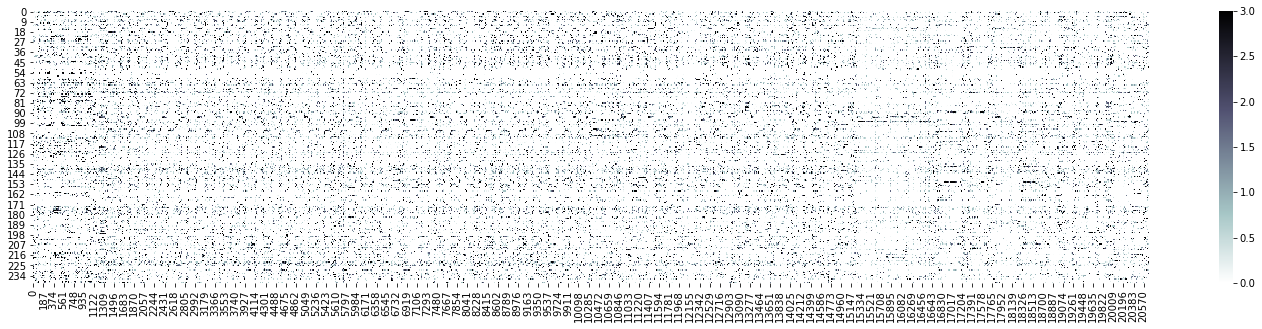

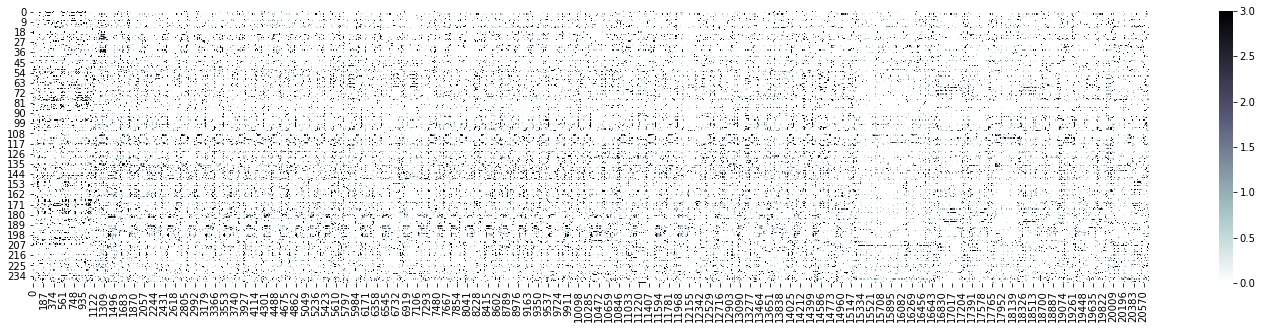

In [121]:

isort = np.argsort(model.embedding[:,0])
plt.figure(figsize=(25,5))
sns.heatmap(sp,vmin=0,vmax=3,cmap='bone_r')
plt.figure(figsize=(25,5))
sns.heatmap(sp[isort,:],vmin=0,vmax=3,cmap='bone_r')

<AxesSubplot:>

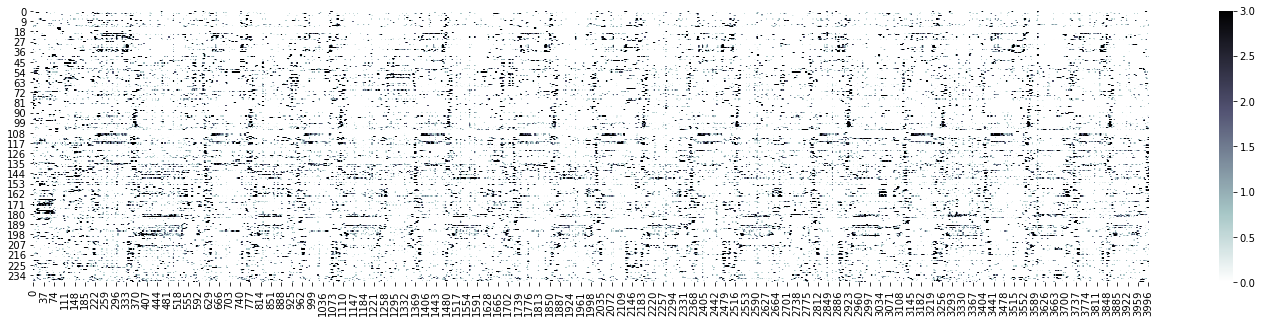

In [123]:
plt.figure(figsize=(25,5))
sns.heatmap(sp[isort,1000:5000],vmin=0,vmax=3,cmap='bone_r')

C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:861: UserWarning: ignoring signal outside of support


<AxesSubplot:>

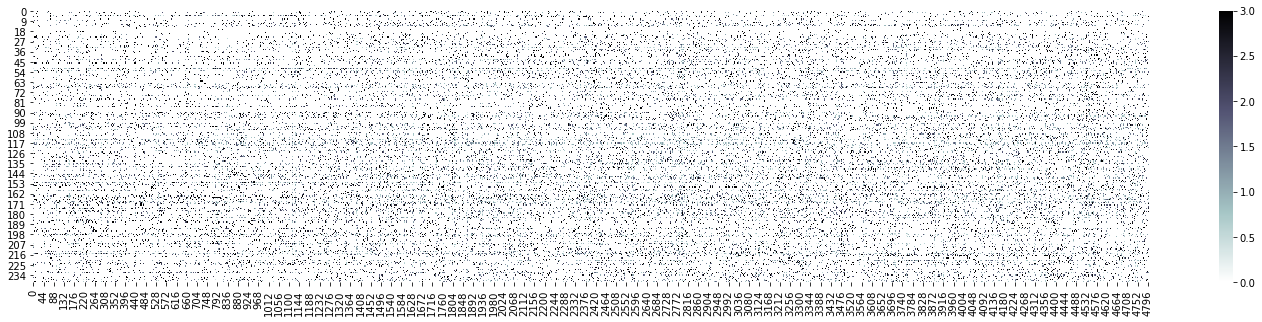

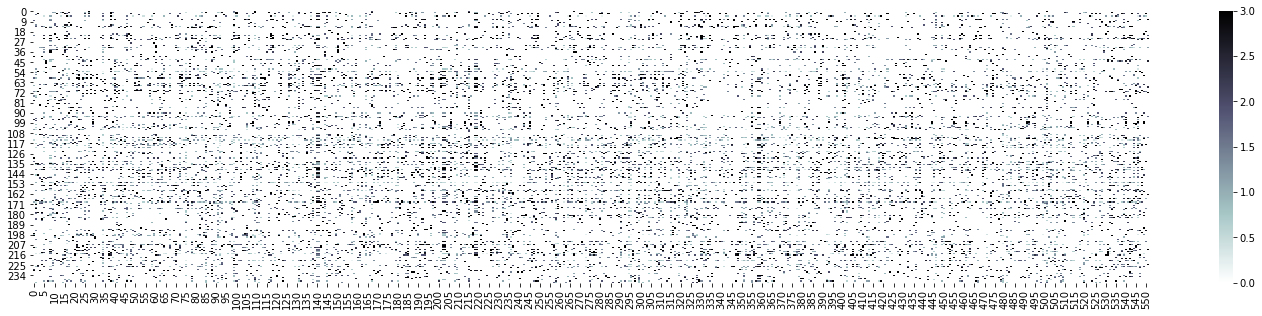

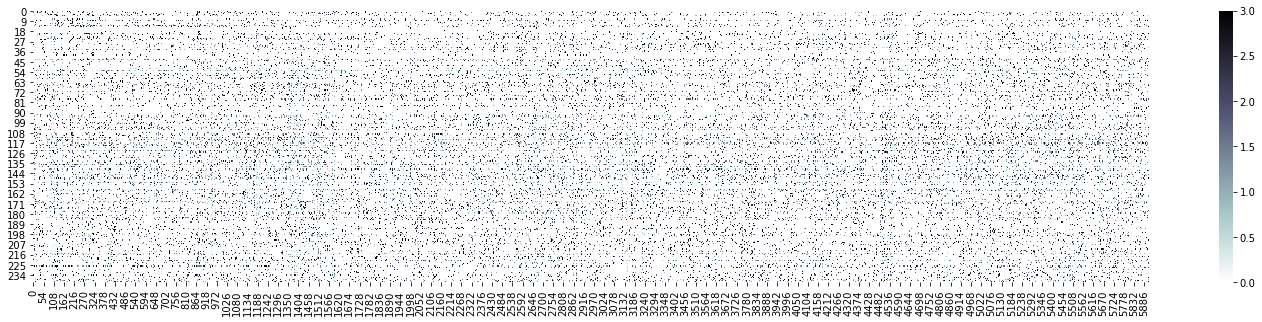

In [128]:
sp_rip_fr = unit_mat_fr_nel[behavioral_epochs[0]].data[isort,:]

plt.figure(figsize=(25,5))
sns.heatmap(sp_rip_fr,vmin=0,vmax=3,cmap='bone_r')

sp_rip_fr = unit_mat_fr_nel[behavioral_epochs[1]].data[isort,:]

plt.figure(figsize=(25,5))
sns.heatmap(sp_rip_fr,vmin=0,vmax=3,cmap='bone_r')

sp_rip_fr = unit_mat_fr_nel[behavioral_epochs[2]].data[isort,:]

plt.figure(figsize=(25,5))
sns.heatmap(sp_rip_fr,vmin=0,vmax=3,cmap='bone_r')